# Fitting curves to point clouds

In [68]:
# Numerical operations:
import numpy as np

# Plotting library:
import matplotlib.pyplot as plt

# Minimizing/fitting library:
import scipy.optimize

<div class="alert alert-block alert-info">
<b>Remember:</b> You can always get help about any function, e.g. 
    <code>np.array</code> 
by typing

``np.array?``
</div>

## Fitting lines or polynomial

Fitting a polynomial to a point cloud.
For this we use the ``polyfit`` function of numpy (https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). 

Source: https://stackoverflow.com/questions/19165259/

Let's start by defining some points and their x and y projections:

In [66]:
points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
x = points[:,0]
y = points[:,1]

Fitting a polynomial of degree ``deg`` is easy as calling:

In [39]:
coeffs = np.polyfit(x, y, deg=3)

The vector ``coeffs`` now contains the coefficients of the polynomial as a vector of length ``deg+1``:

In [19]:
coeffs

array([  0.43452381,  -5.60714286,  16.7797619 , -10.60714286])

It's easy to also get the corresponding function:

In [38]:
f = np.poly1d(coeffs)

Let's finally have a look at the fit:

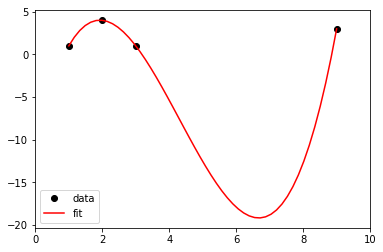

In [21]:
# Some points where we evaluate our new function
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

# Plot the datapoints
plt.plot(x, y, 'ko', label="data")

# Plot our fitted polynomial
plt.plot(x_new, y_new, 'r-', label="fit")

# Add legend etc
plt.legend()
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise 1 [easy]:</b> Fit a straight line to the following dataset and determine the line parameters. Bonus points: Also plot the fit as above.
</div>

In [40]:
x_exercise1 = np.linspace(0, 1, 20)
y_exercise1 = x + np.random.random(len(x))

## Fitting Gaussian (or any arbitrary function)

From https://stackoverflow.com/questions/19206332

Again let's generate some points:

In [41]:
x = scipy.asarray(range(10))
y = 0.3*x + scipy.asarray([0,1,2,3,4,5,4,3,2,1])

Here, we define our own function that we want to fit to our data points:

In [59]:
def gaus(x, norm, mean, sigma):
    # Here x0 is the mean
    return norm*scipy.exp(-(x-mean)**2/(2*sigma**2))

This function has 3 free parameters, ``a``, ``x0``, ``sigm``, which we will now fit:

In [60]:
popt, pcov = scipy.optimize.curve_fit(gaus, x, y)

The variable ``popt`` holds the parameters:

In [61]:
popt

array([6.19486497, 5.74654967, 2.78281294])

The other variable, ``pcov`` holds the covariance matrix of the fitted values. 
This gets relevant once you want to give errors on your fitted quantities, but we'll ignore this for now.

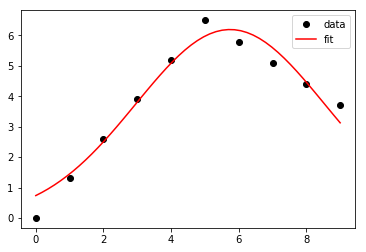

In [62]:
# Plot points
plt.plot(x, y,'ko',label='data')

# Plot our gaussian
# Define some points on the xaxis
x_fine = np.linspace(min(x), max(x), 50)
y_fine = gaus(x_fine, *popt)
# The *  unpacks the values from popt and uses them as
# parameters.

plt.plot(x_fine, y_fine, 'r-', label='fit')

# ...
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
   <b>Exercise 2a [easy]:</b> 
Modify the above example so that the sigma above is 
    <b>fixed</b> to 1.
</div>

<div class="alert alert-block alert-success">
   <b>Exercise 2b [medium]:</b> 
Let's try to fit the same dataset with a slightly more complicated model that consinsts of a 
linear part plus a Gaussian, i.e. 
    
```f(x) = ax + b + gaus(x, norm, mean, sigma)```

<b>Hint</b>:
Create a new function ``mymodel`` which takes the parameters ``x``, as well as all fitted parameters, i.e. ``a``, ``b``, ``norm``, ``mean``, ``sigma``. In the definition you can also use the function ``gaus`` from above!
</div>

<div class="alert alert-block alert-success">
   <b>Exercise 2c [hard]:</b> 
Fit the above points as two lines, i.e. 
$$f(x) = \begin{cases}
  a_1 x + b_1 & \text{if}\ x<c\\
  a_2 x + b_2 & \text{if}\ x\geq c\\
\end{cases}$$
</div>